<a href="https://colab.research.google.com/github/LeeWanYoung/kt230201/blob/main/%EA%B3%B5%EB%AA%A8%EC%A0%84_%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

막대그래프 그릴때 한글깨짐현상 고침.
#자치구별 총생활인구수 평균

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/자치구단위 서울생활인구 일별 집계표.csv')

FileNotFoundError: ignored

In [ ]:
data.head()
#데이터가 일별 총생활인구수를 나타내고있음.
#평균을 해주자.

In [ ]:
seoul=data[data['시군구명'] == '서울시']
seoul=seoul['총생활인구수'].mean()
seoul
#seoul의 평균인구수.

In [ ]:
data = data[data['시군구명'] != '서울시']
data.head()
#서울시 제외 각 자치구별 총 생활인구수 파악을 위해 서울시 삭제.

In [ ]:
data['시군구명'].value_counts()

In [ ]:
data = data.loc[:,['시군구명','총생활인구수']]
data.head(10)
#각 자치구별 총생활인구수만 가져오기

In [ ]:
df = data.groupby('시군구명')['총생활인구수'].mean()
df= pd.DataFrame(df)
df= df.sort_values(by='총생활인구수',ascending=False).head(5)
#자치구별 총생활인구수 평균 내림차순정렬 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=df.reset_index()
#시군구명이라는게 원래 열이여야 하는데, 인덱스로 설정이 되어있어서, 시군구명을 기준으로 그래프를 못그리는 상황
#인덱스로 설정되어 있는 시군구명을 열로 변환 reset_index() 함수를 사용하여 인덱스를 열로 변환

In [ ]:
df

In [ ]:
plt.bar(df['시군구명'], df['총생활인구수'])
plt.title('총생활인구수의 평균')
plt.show()

생활인구는 '등록인구+초단기 유동인구+단기체류자+중장기 체류자'로 정의된다. 초단기 유동인구는 통근·통학자, 쇼핑·의료·교육·종교 등 생활 목적의 주간 유동인구를 말한다. 모든 유동인구를 감안. 2023년 02월달 부터 현재까지를 기준으로 check

# 자치구별 면적!

In [ ]:
df=pd.read_csv('/content/행정구역_20230317022120.csv')
df.head()

In [ ]:
df.drop(columns=['2021.4','2021.5'],axis=1,inplace=True)
df.head()

In [ ]:
df = df.drop(index=[0,1,2])
df.head()

In [ ]:
df['자치구별(1)'].value_counts()

In [ ]:
df.drop(columns='자치구별(1)',axis=1,inplace=True)
df.head(5)

#서울시 기준으로 각 자치구별 면적비율.

In [ ]:
#면적비를 기준으로 내림차순정렬
df.sort_values(by='2021.1',ascending=False,inplace=True)
df=df.head(5)
df

In [ ]:
df.columns=['자치구','면적','면적비','행정(개)','법정(개)']

In [ ]:
df

In [ ]:
import pandas as pd
data = {'자치구': ['서초구', '강서구', '강남구', '노원구', '송파구'], '면적비율': [7.76, 6.85, 6.53, 5.86, 5.60]}
df = pd.DataFrame(data)
plt.bar(df['자치구'], df['면적비율'])
plt.title('서울시 자치구별 면적비율')
plt.show()
#초반에 info()를 통해서 object를 int로 바꿔주지 않아 오류 발생해서
#직접 막대그래프 작성.

In [ ]:
data_area = {'자치구': ['서초구', '강서구', '강남구', '노원구', '송파구'],
             '면적비율': [7.76, 6.85, 6.53, 5.86, 5.60]}
df1 = pd.DataFrame(data_area)
data_pop = {'시군구명': ['강남구', '송파구', '서초구', '강서구', '노원구'],
            '총생활인구수': [838552.345310, 766978.699699, 594306.662426, 556280.623438, 520246.028169]}
df2 = pd.DataFrame(data_pop)
merged_df = pd.merge(df1, df2, left_on='자치구', right_on='시군구명')
merged_df.drop('시군구명', axis=1, inplace=True)
df3=pd.DataFrame(merged_df)
df3
#그냥 데이터프레임으로도 할수있는데 변수 이름 설정시에 대충해서
#merge하는데 복잡해졌다. 직접 merge.

In [ ]:
# 각 자치구의 면적비율당 총생활인구수 계산
df3['면적비율당 총생활인구수'] = df3.apply(lambda row: row['총생활인구수'] / row['면적비율'], axis=1)
df3.sort_values(by='면적비율당 총생활인구수',ascending=False,inplace=True)
df3
# 위 코드에서 apply() 메서드에 lambda 함수를 사용하여 각 행의 총생활인구수 값을 면적비율 값으로 나누어 계산합니다.
#  axis=1 옵션을 추가하여 각 행에 대한 계산을 수행합니다. 계산 결과를 면적비율당 총생활인구수 열에 저장합니다. 
# 이제 df 데이터프레임에는 각 자치구의 면적비율당 총생활인구수가 계산된 결과가 포함되어 있습니다.
# 이 함수,, 이해 잘 안감

서울시 자치구별 면적 대비 총생활인구수! 면적비 순위는 서초 강서 강남 노원 송파 인데 생활인구순위는 강남 송파 서초 강서 노원구 순위이다. 현재 면적 대비 생활인구수가 적은편인데도 불구하고,.. 어린이 보호구역 cctv 수나,어린이 교통사고 비율이 상당히 높은 이유 뭐냐..?로 가설...
빈부격차가 심하다 보니, 행정제도나 이외의 사고대비가 많이 부실한건 아닌가? 라며 데이터 처리

In [ ]:
plt.bar(df3['자치구'], df3['면적비율당 총생활인구수'])
plt.title('면적비율당 총생활인구수')
plt.show()

#어린이 인구check

In [ ]:
df=pd.read_csv('/content/행정동 단위 서울 생활인구(내국인).csv')
df.head()

In [ ]:
df['행정동코드'] = df['행정동코드'] // 1000
df.head()

In [ ]:
grouped = df.groupby('행정동코드')
result = grouped.apply(lambda x: x.loc[(x['시간대구분']>=16) & (x['시간대구분']<=18),
                                       ['남자0세부터9세생활인구수', '남자10세부터14세생활인구수']].mean())
result=pd.DataFrame(result)
result['합계'] = result['남자0세부터9세생활인구수'] + result['남자10세부터14세생활인구수']
result
#교통사고가 가장 많은 시간대인 16시에서 18시 사이의 데이터를 선택하고, 
#해당 시간대에 대한 남자0세부터9세생활인구수와 남자10세부터14세생활인구수의 평균

In [ ]:
result = result.reset_index()
result.columns = ['행정동코드', '남자0세부터9세생활인구수', '남자10세부터14세생활인구수','합계']
result.sort_values(by='합계',ascending=False).head(10)
# 11680 강남구 
# 11710 송파구 
# 11650 서초구 
# 11740 강동구 
# 11470 양천구
# 11350 노원구
# 11500 강서구
# 11380 은평구 
# 11530 구로구
# 11440 마포구

In [ ]:
data = {'행정동코드': ['강남구','송파구','서초구','강동구','양천구','노원구','강서구','은평구','구로구','마포구'],
        '합계': [2054.624509*2, 1860.233765*2, 1845.258729*2, 1836.559837*2, 1640.093946*2,
            1616.524023*2, 1565.159539*2, 1549.218403*2, 1385.217805*2, 1282.073810*2]}
df = pd.DataFrame(data)
# 행정동 코드를 서울시 구 이름으로 매핑

# 막대그래프 그리기
plt.bar(df['행정동코드'], df['합계'])
plt.title('어린이 인구수 순위')
plt.show()

#면적비율당 총 생활인구수 따졋을때..? 4위인데,
#어린이 생활인구수는 7위 0세부터 14세기준★
#생활인구수 대비 어린이 생활인구수가 적다는 얘긴데..?
#즉 총 생활인구수중에 실제 어린이 생활인구수는 적다라는거다.
#그러면 교통사고 비율은..?

#일단은 각 자치구별 교통사고 건수

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/교통사고+현황(구별)_20230317070236.csv')
df.head()

,자치구별(1),자치구별(2),2021,2021.1,2021.2,2021.3,2021.4,2021.5
0,자치구별(1),자치구별(2),발생건수 (건),자동차 1만대당 발생건수 (건),사망자수 (명),인구 10만명당 사망자수 (명),부상자수 (명),인구 10만명당 부상자수 (명)
1,합계,소계,33913,93.9,243,2.5,45223,464.5
2,합계,종로구,778,122.6,6,3.9,1050,682.8
3,합계,중구,854,113.3,3,2.3,1156,877.2
4,합계,용산구,1014,105.1,5,2.1,1369,576.9


In [ ]:
df.drop('자치구별(1)',axis=1,inplace=True)
df.columns = ['자치구별(2)', '발생건수 (건)', '자동차 1만대당 발생건수 (건)', '사망자수 (명)', '인구 10만명당 사망자수 (명)', '부상자수 (명)', '인구 10만명당 부상자수 (명)']
df.drop([0],axis=0,inplace=True)
df.head()

,자치구별(2),발생건수 (건),자동차 1만대당 발생건수 (건),사망자수 (명),인구 10만명당 사망자수 (명),부상자수 (명),인구 10만명당 부상자수 (명)
1,소계,33913,93.9,243,2.5,45223,464.5
2,종로구,778,122.6,6,3.9,1050,682.8
3,중구,854,113.3,3,2.3,1156,877.2
4,용산구,1014,105.1,5,2.1,1369,576.9
5,성동구,1057,84.6,8,2.7,1362,465.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 1 to 26
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   자치구별(2)            26 non-null     object
 1   발생건수 (건)           26 non-null     object
 2   자동차 1만대당 발생건수 (건)  26 non-null     object
 3   사망자수 (명)           26 non-null     object
 4   인구 10만명당 사망자수 (명)  26 non-null     object
 5   부상자수 (명)           26 non-null     object
 6   인구 10만명당 부상자수 (명)  26 non-null     object
dtypes: object(7)
memory usage: 1.6+ KB


In [ ]:
df['발생건수 (건)'] = df['발생건수 (건)'].astype(int)
df=df.sort_values(by='발생건수 (건)', ascending=False)
# 발생건수 기준으로 내림차순정렬을 했음에도 불구하고 정렬이 안되었음.
# 문제는 발생건수 (건) 열이 문자열(string) 형태로 되어있어서 생긴 문제입니다. 
# 이 경우에는 문자열 비교에 따라서 정렬되기 때문에 원하는 결과가 나오지 않을 수 있습니다. 
# 따라서, 발생건수 (건) 열의 데이터 타입을 정수형(int)으로 변환해주어야 합니다.
# 교통사고 발생건수는 1501건.
df.head(15)

,자치구별(2),발생건수 (건),자동차 1만대당 발생건수 (건),사망자수 (명),인구 10만명당 사망자수 (명),부상자수 (명),인구 10만명당 부상자수 (명)
1,소계,33913,93.9,243,2.5,45223,464.5
24,강남구,3820,149.1,10,1.9,5175,962.3
25,송파구,2607,97.6,14,2.1,3509,528.5
20,영등포구,2178,132.2,15,3.7,2967,740.1
23,서초구,2118,112.2,8,1.9,2932,704.5
17,강서구,1501,66.8,13,2.2,2042,352.2
22,관악구,1419,101.8,8,1.6,1829,366.2
12,노원구,1413,84.4,8,1.6,1940,376.7
7,동대문구,1390,113.4,17,4.8,1656,470.4
8,중랑구,1373,98.6,7,1.8,1826,466.0


In [ ]:
df1=df.drop(1,axis=0)
df=df1.head(10)

In [ ]:
import matplotlib.pyplot as plt

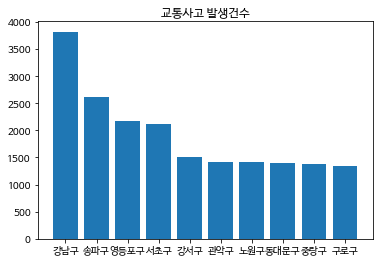

In [ ]:
# 막대그래프 그리기
plt.bar(df['자치구별(2)'], df['발생건수 (건)'])
plt.title('교통사고 발생건수')
plt.show()

In [ ]:
df1['인구 10만명당 부상자수 (명)'] = pd.to_numeric(df1['인구 10만명당 부상자수 (명)'], errors='coerce')
df1['인구 10만명당 부상자수 (명)'] = df1['인구 10만명당 부상자수 (명)'].astype(int)
df1=df1.sort_values(by='인구 10만명당 부상자수 (명)', ascending=False)
#숫자형변수로 바꿔서,실수형을 정수형으로 만드는 과정이다.
#이런 비슷한 실수들을 많이한다.

In [ ]:
df1.head(25)

,자치구별(2),발생건수 (건),자동차 1만대당 발생건수 (건),사망자수 (명),인구 10만명당 사망자수 (명),부상자수 (명),인구 10만명당 부상자수 (명)
24,강남구,3820,149.1,10,1.9,5175,962
3,중구,854,113.3,3,2.3,1156,877
20,영등포구,2178,132.2,15,3.7,2967,740
23,서초구,2118,112.2,8,1.9,2932,704
2,종로구,778,122.6,6,3.9,1050,682
4,용산구,1014,105.1,5,2.1,1369,576
25,송파구,2607,97.6,14,2.1,3509,528
19,금천구,827,81.5,16,6.5,1167,476
7,동대문구,1390,113.4,17,4.8,1656,470
8,중랑구,1373,98.6,7,1.8,1826,466


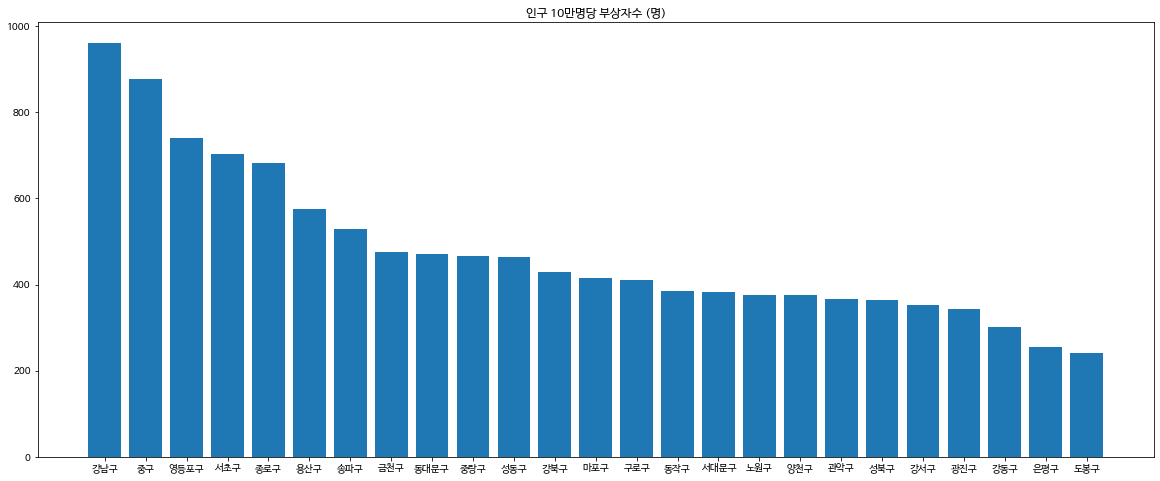

In [ ]:
plt.figure(figsize=(20,8))
plt.bar(df1['자치구별(2)'], df1['인구 10만명당 부상자수 (명)'])
plt.title('인구 10만명당 부상자수 (명)')
plt.show()
#교통사고 발생건수도 5위, 부상자수도 5위 근데
#인구 10만명당 사상자수로 따지면 순위가 매우 적다.?? 이게 무슨 의미지..?
#인구수가 매우 많다.?

#이번에는 어린이 교통사고 현황

In [ ]:
df=pd.read_csv('/content/어린이+교통사고+현황_20230317070306.csv')
df.head(10)

,자치구별(1),자치구별(2),사고현황별(1),2021,2021.1,2021.2
0,자치구별(1),자치구별(2),사고현황별(1),발생건수 (건),사망자수 (명),부상자수 (명)
1,합계,소계,어린이 교통사고,1026,2,1243
2,합계,소계,어린이보호구역내 어린이 교통사고,68,1,83
3,합계,소계,어린이 보행 사상자,-,1,347
4,합계,종로구,어린이 교통사고,15,-,20
5,합계,종로구,어린이보호구역내 어린이 교통사고,1,-,1
6,합계,종로구,어린이 보행 사상자,-,-,2
7,합계,중구,어린이 교통사고,21,-,26
8,합계,중구,어린이보호구역내 어린이 교통사고,1,-,1
9,합계,중구,어린이 보행 사상자,-,-,5


In [ ]:
df = df[df['사고현황별(1)'] == '어린이 교통사고']
#이거 정확히,, 음 조건식 뭐였더라..?
df=df[['자치구별(2)','2021']]
df=df.sort_values(by='2021',ascending=False).head(10)
df
#어린이 교통사고 발생건수는 5위.

,자치구별(2),2021
73,송파구,88
70,강남구,81
58,영등포구,79
46,양천구,68
49,강서구,58
67,서초구,55
34,노원구,55
37,은평구,49
25,성북구,44
76,강동구,40


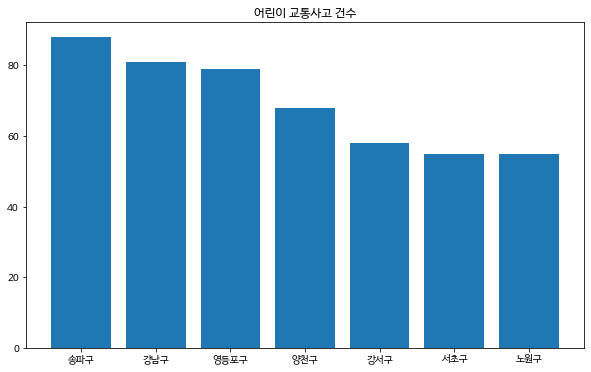

In [ ]:
#마찬가지로,자치구별 어린이 교통사구건수 막대그래프 그리는데 오류
#직접그려줌

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# x, y 데이터 지정
x_data = ['송파구', '강남구', '영등포구', '양천구', '강서구','서초구','노원구']
y_data = [88, 81, 79, 68, 58,55,55]

# 막대 그래프 그리기
plt.bar(x_data, y_data)

# 그래프 제목 설정
plt.title('어린이 교통사고 건수')

# 그래프 보여주기
plt.show()

형사책임 미성년자인 13세(중학교 1학년)까지 어린이로 볼 수 있다

In [ ]:
import pandas as  pd

In [ ]:
df=pd.read_csv('/content/서울시 자치구 목적별 CCTV 설치 수량_221231기준.csv')
#기타 목적으로 설치된 CCTV는 초등학교 내 CCTV, 문화재보호, 그린파킹 주차장 CCTV 등이 있습니다.

In [ ]:
df.head(29)

,구분,총계,방범,어린이\n보호구역,공원·놀이터,쓰레기\n무단투기,시설안전\n·화재예방,교통단속,교통정보\n수집·분석,기타\n다른법령
0,총 계,"91,341","61,972","9,106","7,466","1,461","3,652","7,216",18,450
1,종로구,"1,980","1,604",44,164,0,34,134,0,0
2,중구,"2,584",1680,76,208,62,62,329,0,167
3,용산구,"2,847","2,132",233,166,0,0,316,0,0
4,성동구,"4,047","2,604",621,216,186,0,420,0,0
5,광진구,"3,480","2,464",625,215,66,24,86,0,0
6,동대문구,"2,759","2,063",282,219,28,1,152,0,14
7,중랑구,"4,193","3,514",141,190,11,59,278,0,0
8,성북구,"4,842","2,956",444,236,378,575,235,18,0
9,강북구,"3,321","2,644",351,189,0,35,102,0,0


In [ ]:
df= df.drop(0)
df

,구분,총계,방범,어린이\n보호구역,공원·놀이터,쓰레기\n무단투기,시설안전\n·화재예방,교통단속,교통정보\n수집·분석,기타\n다른법령
1,종로구,"1,980","1,604",44,164,0,34,134,0,0
2,중구,"2,584",1680,76,208,62,62,329,0,167
3,용산구,"2,847","2,132",233,166,0,0,316,0,0
4,성동구,"4,047","2,604",621,216,186,0,420,0,0
5,광진구,"3,480","2,464",625,215,66,24,86,0,0
6,동대문구,"2,759","2,063",282,219,28,1,152,0,14
7,중랑구,"4,193","3,514",141,190,11,59,278,0,0
8,성북구,"4,842","2,956",444,236,378,575,235,18,0
9,강북구,"3,321","2,644",351,189,0,35,102,0,0
10,도봉구,"2,247","1,392",148,293,161,153,100,0,0


In [ ]:
df['총계'] = df['총계'].str.replace(',', '').astype(int)
#음 정확한 의미 확인필요

In [ ]:
df=df.sort_values(by='총계',ascending=False)
df

,구분,총계,방범,어린이\n보호구역,공원·놀이터,쓰레기\n무단투기,시설안전\n·화재예방,교통단속,교통정보\n수집·분석,기타\n다른법령
23,강남구,7243,"4,851","1,157",487,0,126,622,0,0
21,관악구,5398,"3,318",258,306,147,719,650,0,0
22,서초구,4995,"2,682",204,294,0,687,"1,128",0,0
8,성북구,4842,"2,956",444,236,378,575,235,18,0
17,구로구,4693,"3,029",544,412,28,265,415,0,0
12,은평구,4653,"2,880",750,473,0,266,172,0,112
19,영등포,4553,"3,280",283,189,144,107,550,0,0
7,중랑구,4193,"3,514",141,190,11,59,278,0,0
4,성동구,4047,"2,604",621,216,186,0,420,0,0
15,양천구,3851,"2,441",831,351,4,0,172,0,52


Text(0.5, 1.0, 'CCTV 개수')

<Figure size 1440x576 with 0 Axes>

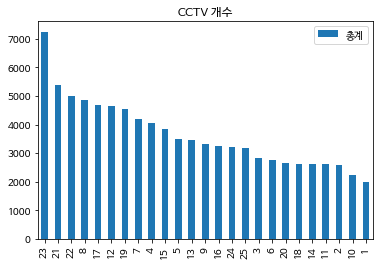

In [ ]:
# "구분"과 "총계" 열만 선택
df1 = df[['구분', '총계']]
# "구분"을 인덱스로 설정
# 막대 그래프 그리기
plt.figure(figsize=(20,8))
df1.plot(kind='bar')
# 그래프 제목 설정
plt.title('CCTV 개수')

# 강서구 cctv 개수 매우 적음 -> 그렇다면 어린이용은

In [ ]:
df=df.sort_values(by='어린이보호구역',ascending=False)
df

KeyError: ignored

In [ ]:
df=df[['구분','어린이\n보호구역']]
df

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


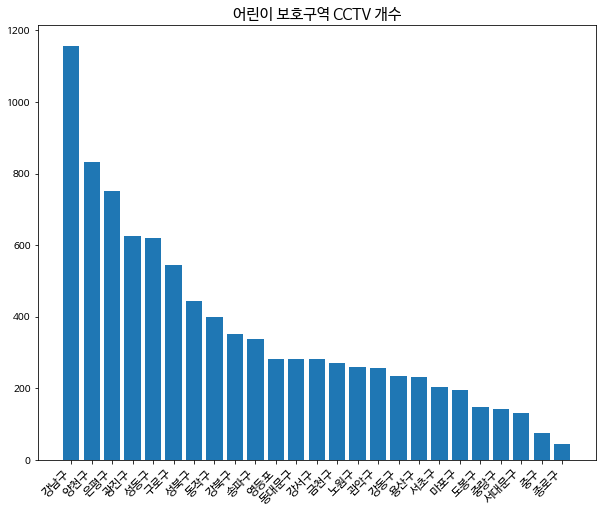

In [ ]:
#파일 불러오기 오류로 인해서,원본파일과 다르게 결측치 존재 오류.
#직접 쓸수밖에없었음.
data = {'구분': [23, 21, 22, 8, 17, 12, 19, 7, 4, 15, 5, 13, 9, 16, 24, 25, 3, 6, 20, 18, 14, 11, 2, 10, 1],
        '어린이 보호구역': [1157, 258, 204, 444, 544, 750, 283, 141, 621, 831, 625, 132, 351, 281, 339, 235, 233, 282, 400, 272, 195, 260, 76, 148, 44],
        '구': ['강남구', '관악구', '서초구', '성북구', '구로구', '은평구', '영등포', '중랑구', '성동구', '양천구', '광진구', '서대문구', '강북구', '강서구', '송파구', '강동구', '용산구', '동대문구', '동작구', '금천구', '마포구', '노원구', '중구', '도봉구', '종로구']}

df = pd.DataFrame(data)
df_sorted = df.sort_values(by='어린이 보호구역', ascending=False)

plt.figure(figsize=(10, 8))
plt.bar(df_sorted['구'], df_sorted['어린이 보호구역'])
plt.title('어린이 보호구역 CCTV 개수', fontsize=15)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.show()


#마찬가지로 적음

In [212]:
import pandas as pd

In [213]:
df = pd.read_csv('/content/accidentInfoList.csv')

In [214]:
df.head(5)

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2018010100100027,2018년 1월 1일 01시,월요일,서울특별시 송파구 풍납동,중상사고,0,3,2,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로안,승합,남,41세,경상,승용,남,50세,상해없음
1,2018010100100219,2018년 1월 1일 13시,월요일,서울특별시 중랑구 망우동,중상사고,0,3,0,0,차대차 - 추돌,...,맑음,교차로 - 교차로안,승합,남,52세,상해없음,승용,남,45세,중상
2,2018010200100351,2018년 1월 2일 18시,화요일,서울특별시 양천구 목동,중상사고,0,1,1,0,차대차 - 추돌,...,맑음,단일로 - 기타,승용,여,58세,상해없음,승용,여,40세,중상
3,2018010300100131,2018년 1월 3일 10시,수요일,서울특별시 용산구 문배동,경상사고,0,0,2,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로부근,화물,남,64세,상해없음,승용,남,39세,경상
4,2018010300100176,2018년 1월 3일 12시,수요일,서울특별시 노원구 상계동,경상사고,0,0,1,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로횡단보도내,승용,남,45세,상해없음,자전거,남,11세,경상


In [215]:
df = df[['사고일시', '시군구', '피해운전자 연령']]
df.head(5)

,사고일시,시군구,피해운전자 연령
0,2018년 1월 1일 01시,서울특별시 송파구 풍납동,50세
1,2018년 1월 1일 13시,서울특별시 중랑구 망우동,45세
2,2018년 1월 2일 18시,서울특별시 양천구 목동,40세
3,2018년 1월 3일 10시,서울특별시 용산구 문배동,39세
4,2018년 1월 3일 12시,서울특별시 노원구 상계동,11세


In [216]:
# '서울특별시' 제거
df['시군구'] = df['시군구'].str.replace('서울특별시 ', '')

# 시군구 컬럼에서 '군'만 추출
df['시군구'] = df['시군구'].str.split(' ').str[0]

# 결과 출력
print(df.head())

              사고일시  시군구 피해운전자 연령
0  2018년 1월 1일 01시  송파구      50세
1  2018년 1월 1일 13시  중랑구      45세
2  2018년 1월 2일 18시  양천구      40세
3  2018년 1월 3일 10시  용산구      39세
4  2018년 1월 3일 12시  노원구      11세


In [217]:
df.head(20)

,사고일시,시군구,피해운전자 연령
0,2018년 1월 1일 01시,송파구,50세
1,2018년 1월 1일 13시,중랑구,45세
2,2018년 1월 2일 18시,양천구,40세
3,2018년 1월 3일 10시,용산구,39세
4,2018년 1월 3일 12시,노원구,11세
5,2018년 1월 3일 13시,강서구,66세
6,2018년 1월 4일 16시,영등포구,4세
7,2018년 1월 4일 20시,양천구,7세
8,2018년 1월 5일 12시,서대문구,64세
9,2018년 1월 5일 13시,강서구,5세


In [218]:
# 사고일시 열에서 시간 정보만 추출하기
df['사고시간'] = df['사고일시'].str.extract('(\d+)시', expand=False).astype(int)

In [219]:
df.head(20)

,사고일시,시군구,피해운전자 연령,사고시간
0,2018년 1월 1일 01시,송파구,50세,1
1,2018년 1월 1일 13시,중랑구,45세,13
2,2018년 1월 2일 18시,양천구,40세,18
3,2018년 1월 3일 10시,용산구,39세,10
4,2018년 1월 3일 12시,노원구,11세,12
5,2018년 1월 3일 13시,강서구,66세,13
6,2018년 1월 4일 16시,영등포구,4세,16
7,2018년 1월 4일 20시,양천구,7세,20
8,2018년 1월 5일 12시,서대문구,64세,12
9,2018년 1월 5일 13시,강서구,5세,13


In [147]:
# 피해운전자 연령에서 원하는 범위 데이터만 추출하기
df = df[df['피해운전자 연령'].str.contains('^\d+세$')]
df['피해운전자 연령'] = df['피해운전자 연령'].str.extract('(\d+)', expand=False).astype(int)
df = df[(df['피해운전자 연령'] >= 0) & (df['피해운전자 연령'] < 14)]

ValueError: ignored

In [220]:
df.isna().sum()
#약 3700건중 피해운전자 연령 결측치 53개 삭제.

사고일시         0
시군구          0
피해운전자 연령    53
사고시간         0
dtype: int64

In [221]:
df = df.dropna(subset=['피해운전자 연령'])

# 피해운전자 연령에서 원하는 범위 데이터만 추출하기
df = df[df['피해운전자 연령'].str.contains('^\d+세$')]
df['피해운전자 연령'] = df['피해운전자 연령'].str.extract('(\d+)', expand=False).astype(int)
df = df[(df['피해운전자 연령'] >= 0) & (df['피해운전자 연령'] < 14)]

In [222]:
df.head(20)

,사고일시,시군구,피해운전자 연령,사고시간
4,2018년 1월 3일 12시,노원구,11,12
6,2018년 1월 4일 16시,영등포구,4,16
7,2018년 1월 4일 20시,양천구,7,20
9,2018년 1월 5일 13시,강서구,5,13
11,2018년 1월 5일 23시,양천구,7,23
18,2018년 1월 8일 18시,동작구,11,18
22,2018년 1월 10일 13시,양천구,8,13
24,2018년 1월 10일 17시,구로구,11,17
25,2018년 1월 10일 17시,강남구,10,17
27,2018년 1월 11일 11시,광진구,9,11


In [223]:
df=df[['시군구','사고시간']]
df

,시군구,사고시간
4,노원구,12
6,영등포구,16
7,양천구,20
9,강서구,13
11,양천구,23
...,...,...
3713,마포구,21
3716,도봉구,11
3717,성북구,8
3725,강동구,18


In [224]:
df_child=df.groupby('사고시간').count()
df_child.columns = ['발생 건수']
df_child

,발생 건수
사고시간,
0,6
2,2
4,1
6,2
7,5
8,92
9,29
10,36
11,45


In [225]:
df_child = df_child.reindex(range(24), fill_value=0)
df_child

,발생 건수
사고시간,
0,6
1,0
2,2
3,0
4,1
5,0
6,2
7,5
8,92


In [226]:
# 인덱스에서 열로 변경
df_child = df_child.reset_index()
# 컬럼명 변경
df_child.columns = ['시간대', '발생 건수']
df_child

,시간대,발생 건수
0,0,6
1,1,0
2,2,2
3,3,0
4,4,1
5,5,0
6,6,2
7,7,5
8,8,92
9,9,29


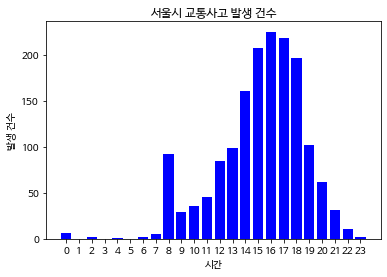

In [227]:
# 그래프 그리기
plt.bar(df_child.index, df_child['발생 건수'], color='blue')

# x축 눈금 설정
plt.xticks(range(0, 24, 1))

# 그래프 제목, 축 레이블 설정
plt.title('서울시 교통사고 발생 건수')
plt.xlabel('시간')
plt.ylabel('발생 건수')

# 그래프 보여주기
plt.show()

In [201]:
df1=df[df['시군구']=='강서구']

In [202]:
df1

,시군구,사고시간
9,강서구,13
80,강서구,14
130,강서구,16
161,강서구,11
180,강서구,11
...,...,...
3450,강서구,12
3509,강서구,17
3570,강서구,17
3587,강서구,15


In [203]:
df1_child=df1.groupby('사고시간').count()
df1_child.columns = ['발생 건수']
df1_child

,발생 건수
사고시간,
0,3
8,4
9,2
10,3
11,4
12,4
13,6
14,7
15,14


In [204]:
df1_child = df1_child.reindex(range(24), fill_value=0)
df1_child

,발생 건수
사고시간,
0,3
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,4


In [205]:
# 인덱스에서 열로 변경
df1_child = df1_child.reset_index()
# 컬럼명 변경
df1_child.columns = ['시간대', '발생 건수']
df1_child

,시간대,발생 건수
0,0,3
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,4
9,9,2


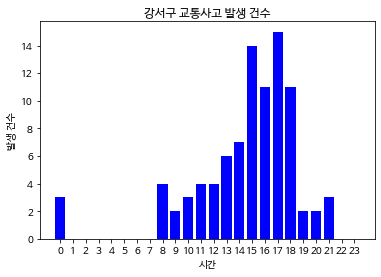

In [207]:
# 그래프 그리기
plt.bar(df1_child.index, df1_child['발생 건수'], color='blue')

# x축 눈금 설정
plt.xticks(range(0, 24, 1))

# 그래프 제목, 축 레이블 설정
plt.title('강서구 교통사고 발생 건수')
plt.xlabel('시간')
plt.ylabel('발생 건수')

# 그래프 보여주기
plt.show()